# Project 2 CS450

Wednesday, May 12th, 2021

Group: Bradley Van Egeren, Jan Roessler

## Unconstraint Face Recogonition Using The Labeled Faces In The Wild Dataset

Dataset: https://www.kaggle.com/jessicali9530/lfw-dataset 

### Context and Importance

"The growing demand for highly accurate surveillance, intelligence, and forensics systems has propelled the unconstrained recognition problem (1:N matching; also known as "identification") to the forefront of computer vision research. Over the past decade, excellent progress has been made toward the constrained and unconstrained verification (1:1 matching) problems. For controlled face verification, 99.9% accuracy was achieved for the FRGC set. For uncontrolled face verification, 88.13% accuracy has been reported for the once very difficult LFW set."
("Unconstraint Face Recognition", Walter J. Scheirer, https://www.wjscheirer.com/projects/unconstrained-face/)

Labeled Faces in the Wild (LFW) is a database of face photographs designed for studying the problem of unconstrained face recognition. This database was created and maintained by researchers at the University of Massachusetts, Amherst (specific references are in Acknowledgments section). 13,233 images of 5,749 people were detected and centered by the Viola Jones face detector and collected from the web. 1,680 of the people pictured have two or more distinct photos in the dataset. 

https://www.youtube.com/watch?v=CKJxUopfTHE 

Summary:

1. Installation of Packages
2. Data Read-In 
3. Data Analysis
4. Model Construction
5. Visualization of CNN
6. Results Analysis 

### 1. Installation of Packages

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import OrderedDict

from PIL import Image

import matplotlib.patches as patches

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from sklearn.model_selection import train_test_split

### 2. Data Read-In

In [2]:
path = '/Users/jan_roessler/Desktop/CSCI450/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/'

lfw_allnames = pd.read_csv('/Users/jan_roessler/Desktop/CSCI450/lfw-dataset/lfw_allnames.csv')

matchpairsDevTest = pd.read_csv('/Users/jan_roessler/Desktop/CSCI450/lfw-dataset/matchpairsDevTest.csv')
matchpairsDevTrain = pd.read_csv('/Users/jan_roessler/Desktop/CSCI450/lfw-dataset/matchpairsDevTrain.csv')
mismatchpairsDevTest = pd.read_csv('/Users/jan_roessler/Desktop/CSCI450/lfw-dataset/mismatchpairsDevTest.csv')
mismatchpairsDevTrain = pd.read_csv('/Users/jan_roessler/Desktop/CSCI450/lfw-dataset/mismatchpairsDevTrain.csv')

pairs = pd.read_csv('/Users/jan_roessler/Desktop/CSCI450/lfw-dataset/pairs.csv')

people = pd.read_csv('/Users/jan_roessler/Desktop/CSCI450/lfw-dataset/people.csv')
peopleDevTest = pd.read_csv('/Users/jan_roessler/Desktop/CSCI450/lfw-dataset/peopleDevTest.csv')
peopleDevTrain = pd.read_csv('/Users/jan_roessler/Desktop/CSCI450/lfw-dataset/peopleDevTrain.csv')

Testing set for matching pairs. imagenum1 and imagenum2 tell you the number ID of the images to pick. Each image is denoted by a name and then a number ID:

In [3]:
matchpairsDevTest

,name,imagenum1,imagenum2
0,Abdullah_Gul,13,14
1,Abdullah_Gul,13,16
2,Abdullatif_Sener,1,2
3,Adel_Al-Jubeir,1,3
4,Al_Pacino,1,2
...,...,...,...
495,Winona_Ryder,6,15
496,Winona_Ryder,19,21
497,Yevgeny_Kafelnikov,3,4
498,Yoriko_Kawaguchi,3,10


Training set for matching pairs. imagenum1 and imagenum2 tell you the number ID of the images to pick. Each image is denoted by a name and then a number ID:

In [4]:
matchpairsDevTrain

,name,imagenum1,imagenum2
0,Aaron_Peirsol,1,2
1,Aaron_Peirsol,3,4
2,Aaron_Sorkin,1,2
3,Abdel_Nasser_Assidi,1,2
4,Abdullah,1,3
...,...,...,...
1095,Zhu_Rongji,1,9
1096,Zhu_Rongji,4,7
1097,Zhu_Rongji,4,8
1098,Zhu_Rongji,5,6


Testing set for mismatching pairs. imagenum1 and imagenum2 tell you the number ID of the images to pick. Each image is denoted by a name and then a number ID:

In [5]:
mismatchpairsDevTest

,name,imagenum1,name.1,imagenum2
0,AJ_Lamas,1,Zach_Safrin,1
1,Aaron_Guiel,1,Reese_Witherspoon,3
2,Aaron_Tippin,1,Jose_Luis_Rodriguez_Zapatero,1
3,Abdul_Majeed_Shobokshi,1,Charles_Cope,1
4,Abdullah_Gul,16,Steve_Cox,1
...,...,...,...,...
495,Susan_Whelan,1,Wolfgang_Schneiderhan,1
496,Takeo_Fukui,1,Will_Ofenheusle,1
497,Tamara_Mowry,1,Zach_Parise,1
498,Tatiana_Kennedy_Schlossberg,1,Thomas_Watjen,1


Training set for mismatching pairs. imagenum1 and imagenum2 tell you the number ID of the images to pick. Each image is denoted by a name and then a number ID:

In [6]:
mismatchpairsDevTrain

,name,imagenum1,name.1,imagenum2
0,AJ_Cook,1,Marsha_Thomason,1
1,Aaron_Sorkin,2,Frank_Solich,5
2,Abdel_Nasser_Assidi,2,Hilary_McKay,1
3,Abdoulaye_Wade,4,Linda_Dano,1
4,Abdul_Rahman,1,Magui_Serna,1
...,...,...,...,...
1095,Tom_Vilsack,1,Wayne_Ferreira,5
1096,Trisha_Meili,1,Vladimiro_Montesinos,3
1097,Ty_Votaw,1,Wayne_Allard,1
1098,Vytas_Danelius,1,Zaini_Abdullah,1


Pairs paradigm (image restricted configuration) for forming the training sets. imagenum1 and imagenum2 tell you the number ID of the images to pick. In the dataset, each image is denoted by a name and then a number ID:

In [7]:
pairs

,name,imagenum1,imagenum2,Unnamed: 3
0,Abel_Pacheco,1,4,NaN
1,Akhmed_Zakayev,1,3,NaN
2,Akhmed_Zakayev,2,3,NaN
3,Amber_Tamblyn,1,2,NaN
4,Anders_Fogh_Rasmussen,1,3,NaN
...,...,...,...,...
5995,Scott_Wolf,2,Troy_Polamalu,1.0
5996,Sergei_Alexandrovitch_Ordzhonikidze,1,Yolanda_King,1.0
5997,Shane_Loux,1,Val_Ackerman,1.0
5998,Shawn_Marion,1,Shirley_Jones,1.0


Names of all faces in this dataset with number of images for each name:

In [8]:
people

,name,images
0,Abdel_Madi_Shabneh,1.0
1,Abdul_Rahman,1.0
2,Abel_Pacheco,4.0
3,Adriana_Lima,1.0
4,Afton_Smith,1.0
...,...,...
5753,Yves_Brodeur,1.0
5754,Zach_Pillar,1.0
5755,Zafarullah_Khan_Jamali,2.0
5756,Zara_Akhmadova,1.0


Testing set for people paradigm. images tell you the number of images for each name that should be included in each set:

In [9]:
peopleDevTest

,name,images
0,AJ_Lamas,1
1,Aaron_Guiel,1
2,Aaron_Tippin,1
3,Abba_Eban,1
4,Abdul_Majeed_Shobokshi,1
...,...,...
1706,Zhang_Ziyi,4
1707,Zoe_Ball,1
1708,Zoran_Djindjic,4
1709,Zulfiqar_Ahmed,1


Training set for people paradigm. images tell you the number of images for each name that should be included in each set:

In [10]:
peopleDevTrain

,name,images
0,AJ_Cook,1
1,Aaron_Eckhart,1
2,Aaron_Patterson,1
3,Aaron_Peirsol,4
4,Aaron_Pena,1
...,...,...
4033,Zinedine_Zidane,6
4034,Ziwang_Xu,1
4035,Zorica_Radovic,1
4036,Zumrati_Juma,1


In [16]:
people = people[people.name.notnull()]

In [17]:
people

,name,images
0,Abdel_Madi_Shabneh,1.0
1,Abdul_Rahman,1.0
2,Abel_Pacheco,4.0
3,Adriana_Lima,1.0
4,Afton_Smith,1.0
...,...,...
5753,Yves_Brodeur,1.0
5754,Zach_Pillar,1.0
5755,Zafarullah_Khan_Jamali,2.0
5756,Zara_Akhmadova,1.0


### 3. Data Analysis

In [18]:
print("There are " + 
      str(lfw_allnames.shape[0]) + 
      " unique celebrities in the entire dataset, of whom " + 
      str(sum(lfw_allnames.images > 1)) + 
      " are represented by multiple images. The entire number of images available is " + 
      str(sum(lfw_allnames.images)) + 
      ". The most represented celebrity is " + 
      str(lfw_allnames.iloc[lfw_allnames['images'].idxmax()][0]) + 
      ", with " + 
      str(max(lfw_allnames.images)) + 
      " unique images in our dataset.")

There are 5749 unique celebrities in the entire dataset, of whom 1680 are represented by multiple images. The entire number of images available is 13233. The most represented celebrity is George_W_Bush, with 530 unique images in our dataset.


In [19]:
image_paths = lfw_allnames.loc[lfw_allnames.index.repeat(lfw_allnames['images'])]
image_paths['image_path'] = 1 + image_paths.groupby('name').cumcount()
image_paths['image_path'] = image_paths.image_path.apply(lambda x: '{0:0>4}'.format(x))
image_paths['image_path'] = image_paths.name + "/" + image_paths.name + "_" + image_paths.image_path + ".jpg"
image_paths = image_paths.drop("images",1)

In [20]:
widths = []
heights = []
files = image_paths.image_path
for file in files:
    paths = '/Users/jan_roessler/Desktop/CSCI450/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/' + str(file)
    im = Image.open(paths)
    widths.append(im.width)
    heights.append(im.height)

pd.DataFrame({'height':heights,'width':widths}).describe()

,height,width
count,13233.0,13233.0
mean,250.0,250.0
std,0.0,0.0
min,250.0,250.0
25%,250.0,250.0
50%,250.0,250.0
75%,250.0,250.0
max,250.0,250.0


Exploring all images of the dataset, to ensure that all images have the same dimensions (width and height). 

<AxesSubplot:>

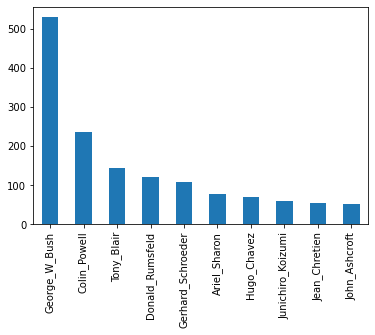

In [21]:
image_paths['name'].value_counts()[:10].plot(kind = "bar")

We can see that there are some very well-represented figures among the top 10: generally political and generally male. This has important implications for the usefulness of this dataset in generalizations.

<AxesSubplot:>

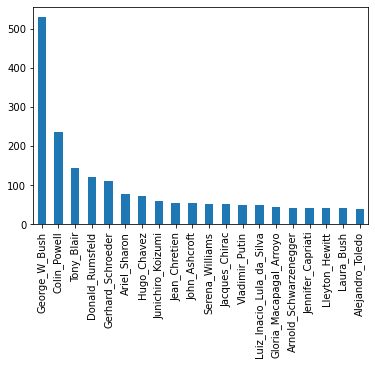

In [22]:
image_paths['name'].value_counts()[:20].plot(kind = "bar")

In [23]:
image_paths['name'].value_counts()

George_W_Bush        530
Colin_Powell         236
Tony_Blair           144
Donald_Rumsfeld      121
Gerhard_Schroeder    109
                    ... 
James_Coburn           1
Rick_Reed              1
David_Shayler          1
Hubie_Brown            1
Gracia_Burnham         1
Name: name, Length: 5749, dtype: int64

### 4. Model Construction 

In [24]:
image_paths

,name,image_path
0,AJ_Cook,AJ_Cook/AJ_Cook_0001.jpg
1,AJ_Lamas,AJ_Lamas/AJ_Lamas_0001.jpg
2,Aaron_Eckhart,Aaron_Eckhart/Aaron_Eckhart_0001.jpg
3,Aaron_Guiel,Aaron_Guiel/Aaron_Guiel_0001.jpg
4,Aaron_Patterson,Aaron_Patterson/Aaron_Patterson_0001.jpg
...,...,...
5744,Zorica_Radovic,Zorica_Radovic/Zorica_Radovic_0001.jpg
5745,Zulfiqar_Ahmed,Zulfiqar_Ahmed/Zulfiqar_Ahmed_0001.jpg
5746,Zumrati_Juma,Zumrati_Juma/Zumrati_Juma_0001.jpg
5747,Zurab_Tsereteli,Zurab_Tsereteli/Zurab_Tsereteli_0001.jpg


In [25]:
image_paths2 = image_paths.groupby('name').filter(lambda x : len(x)>30)

In [26]:
image_paths2

,name,image_path
127,Alejandro_Toledo,Alejandro_Toledo/Alejandro_Toledo_0001.jpg
127,Alejandro_Toledo,Alejandro_Toledo/Alejandro_Toledo_0002.jpg
127,Alejandro_Toledo,Alejandro_Toledo/Alejandro_Toledo_0003.jpg
127,Alejandro_Toledo,Alejandro_Toledo/Alejandro_Toledo_0004.jpg
127,Alejandro_Toledo,Alejandro_Toledo/Alejandro_Toledo_0005.jpg
...,...,...
5569,Vladimir_Putin,Vladimir_Putin/Vladimir_Putin_0045.jpg
5569,Vladimir_Putin,Vladimir_Putin/Vladimir_Putin_0046.jpg
5569,Vladimir_Putin,Vladimir_Putin/Vladimir_Putin_0047.jpg
5569,Vladimir_Putin,Vladimir_Putin/Vladimir_Putin_0048.jpg


In [27]:
image_paths2.name.value_counts()

George_W_Bush                530
Colin_Powell                 236
Tony_Blair                   144
Donald_Rumsfeld              121
Gerhard_Schroeder            109
Ariel_Sharon                  77
Hugo_Chavez                   71
Junichiro_Koizumi             60
Jean_Chretien                 55
John_Ashcroft                 53
Jacques_Chirac                52
Serena_Williams               52
Vladimir_Putin                49
Luiz_Inacio_Lula_da_Silva     48
Gloria_Macapagal_Arroyo       44
Arnold_Schwarzenegger         42
Jennifer_Capriati             42
Laura_Bush                    41
Lleyton_Hewitt                41
Hans_Blix                     39
Alejandro_Toledo              39
Nestor_Kirchner               37
Andre_Agassi                  36
Alvaro_Uribe                  35
Tom_Ridge                     33
Silvio_Berlusconi             33
Megawati_Sukarnoputri         33
Vicente_Fox                   32
Roh_Moo-hyun                  32
Kofi_Annan                    32
David_Beck

In [28]:
image_pathsFinal = image_paths2.drop(image_paths2[image_paths2.name.isin(["George_W_Bush", "Colin_Powell", "Tony_Blair", "Donald_Rumsfeld", "Gerhard_Schroeder", "Ariel_Sharon", "Hugo_Chavez", "Junichiro_Koizumi"])].index)

In [29]:
image_pathsFinal.name.value_counts()

Jean_Chretien                55
John_Ashcroft                53
Jacques_Chirac               52
Serena_Williams              52
Vladimir_Putin               49
Luiz_Inacio_Lula_da_Silva    48
Gloria_Macapagal_Arroyo      44
Jennifer_Capriati            42
Arnold_Schwarzenegger        42
Lleyton_Hewitt               41
Laura_Bush                   41
Alejandro_Toledo             39
Hans_Blix                    39
Nestor_Kirchner              37
Andre_Agassi                 36
Alvaro_Uribe                 35
Tom_Ridge                    33
Megawati_Sukarnoputri        33
Silvio_Berlusconi            33
Kofi_Annan                   32
Roh_Moo-hyun                 32
Vicente_Fox                  32
David_Beckham                31
John_Negroponte              31
Name: name, dtype: int64

In [30]:
len(image_pathsFinal)

962

In [31]:
multi_data = pd.concat([image_paths[image_paths.name=="George_W_Bush"].sample(55),
                        image_paths[image_paths.name=="Colin_Powell"].sample(55),
                        image_paths[image_paths.name=="Tony_Blair"].sample(55),
                        image_paths[image_paths.name=="Donald_Rumsfeld"].sample(55),
                        image_paths[image_paths.name=="Gerhard_Schroeder"].sample(55),
                        image_paths[image_paths.name=="Ariel_Sharon"].sample(55),
                        image_paths[image_paths.name=="Hugo_Chavez"].sample(55),
                        image_paths[image_paths.name=="Junichiro_Koizumi"].sample(55)])

In [32]:
multi_data

,name,image_path
1871,George_W_Bush,George_W_Bush/George_W_Bush_0127.jpg
1871,George_W_Bush,George_W_Bush/George_W_Bush_0347.jpg
1871,George_W_Bush,George_W_Bush/George_W_Bush_0298.jpg
1871,George_W_Bush,George_W_Bush/George_W_Bush_0418.jpg
1871,George_W_Bush,George_W_Bush/George_W_Bush_0439.jpg
...,...,...
2941,Junichiro_Koizumi,Junichiro_Koizumi/Junichiro_Koizumi_0012.jpg
2941,Junichiro_Koizumi,Junichiro_Koizumi/Junichiro_Koizumi_0044.jpg
2941,Junichiro_Koizumi,Junichiro_Koizumi/Junichiro_Koizumi_0022.jpg
2941,Junichiro_Koizumi,Junichiro_Koizumi/Junichiro_Koizumi_0002.jpg


In [33]:
multi_data = multi_data.append(image_pathsFinal, ignore_index = True)

In [34]:
multi_data

,name,image_path
0,George_W_Bush,George_W_Bush/George_W_Bush_0127.jpg
1,George_W_Bush,George_W_Bush/George_W_Bush_0347.jpg
2,George_W_Bush,George_W_Bush/George_W_Bush_0298.jpg
3,George_W_Bush,George_W_Bush/George_W_Bush_0418.jpg
4,George_W_Bush,George_W_Bush/George_W_Bush_0439.jpg
...,...,...
1397,Vladimir_Putin,Vladimir_Putin/Vladimir_Putin_0045.jpg
1398,Vladimir_Putin,Vladimir_Putin/Vladimir_Putin_0046.jpg
1399,Vladimir_Putin,Vladimir_Putin/Vladimir_Putin_0047.jpg
1400,Vladimir_Putin,Vladimir_Putin/Vladimir_Putin_0048.jpg


In [35]:
multi_data.name.value_counts()

Tony_Blair                   55
Junichiro_Koizumi            55
Hugo_Chavez                  55
Jean_Chretien                55
Ariel_Sharon                 55
Donald_Rumsfeld              55
Colin_Powell                 55
George_W_Bush                55
Gerhard_Schroeder            55
John_Ashcroft                53
Serena_Williams              52
Jacques_Chirac               52
Vladimir_Putin               49
Luiz_Inacio_Lula_da_Silva    48
Gloria_Macapagal_Arroyo      44
Jennifer_Capriati            42
Arnold_Schwarzenegger        42
Laura_Bush                   41
Lleyton_Hewitt               41
Hans_Blix                    39
Alejandro_Toledo             39
Nestor_Kirchner              37
Andre_Agassi                 36
Alvaro_Uribe                 35
Megawati_Sukarnoputri        33
Tom_Ridge                    33
Silvio_Berlusconi            33
Roh_Moo-hyun                 32
Vicente_Fox                  32
Kofi_Annan                   32
David_Beckham                31
John_Neg

<AxesSubplot:>

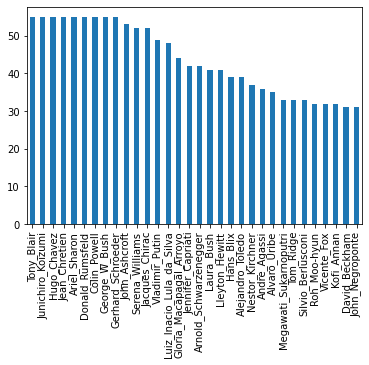

In [36]:
multi_data['name'].value_counts().plot(kind = "bar")

As mentioned before, there is a clear issue with class imbalance here: to ensure more balanced classes, we could have up-sampled some of the low-representation individuals, but in the interests of algorithmic speed we instead down-sampled the high-representation individuals. 

In [37]:
# Set parameters here 
INPUT_SIZE = 128
BATCH_SIZE = 8

SEED = 12345
np.random.seed(SEED)

In [38]:
myclasses = multi_data.name.unique()
NUMCLASSES = len(myclasses)
print(NUMCLASSES)

32


In [39]:
myclasses

array(['George_W_Bush', 'Colin_Powell', 'Tony_Blair', 'Donald_Rumsfeld',
       'Gerhard_Schroeder', 'Ariel_Sharon', 'Hugo_Chavez',
       'Junichiro_Koizumi', 'Alejandro_Toledo', 'Alvaro_Uribe',
       'Andre_Agassi', 'Arnold_Schwarzenegger', 'David_Beckham',
       'Gloria_Macapagal_Arroyo', 'Hans_Blix', 'Jacques_Chirac',
       'Jean_Chretien', 'Jennifer_Capriati', 'John_Ashcroft',
       'John_Negroponte', 'Kofi_Annan', 'Laura_Bush', 'Lleyton_Hewitt',
       'Luiz_Inacio_Lula_da_Silva', 'Megawati_Sukarnoputri',
       'Nestor_Kirchner', 'Roh_Moo-hyun', 'Serena_Williams',
       'Silvio_Berlusconi', 'Tom_Ridge', 'Vicente_Fox', 'Vladimir_Putin'],
      dtype=object)

In [40]:
train_datagen = ImageDataGenerator(
                                featurewise_center=False,
                                samplewise_center=True,
                                featurewise_std_normalization=False,
                                samplewise_std_normalization=True,
                                zca_epsilon=1e-06,
                                rotation_range=5,
                                width_shift_range=0.05,
                                height_shift_range=0.05,
                                brightness_range=None,
                                shear_range=0.5,
                                zoom_range=0.05,
                                channel_shift_range=0.0,
                                fill_mode="nearest",
                                cval=0.0,
                                horizontal_flip=False,
                                vertical_flip=False,
                                rescale=1./255,
                                preprocessing_function=None,
                                data_format=None,
                                validation_split=0.2,
                                dtype=None,
                            )

#create test_datagen without augmentation and without validation split 

test_datagen = ImageDataGenerator(
                                featurewise_center=False,
                                samplewise_center=True,
                                featurewise_std_normalization=False,
                                samplewise_std_normalization=True,
                                zca_epsilon=1e-06,
                                rotation_range=0.0,
                                width_shift_range=0.0,
                                height_shift_range=0.0,
                                brightness_range=None,
                                shear_range=0.0,
                                zoom_range=0.0,
                                channel_shift_range=0.0,
                                fill_mode="nearest",
                                cval=0.0,
                                horizontal_flip=False,
                                vertical_flip=False,
                                rescale=1./255,
                                preprocessing_function=None,
                                data_format=None,
                                validation_split=0.0,
                                dtype=None,
                            )

In [41]:
multi_data = multi_data.sample(frac=1.0)
multi_data.head()

,name,image_path
1143,Nestor_Kirchner,Nestor_Kirchner/Nestor_Kirchner_0010.jpg
420,Junichiro_Koizumi,Junichiro_Koizumi/Junichiro_Koizumi_0039.jpg
447,Alejandro_Toledo,Alejandro_Toledo/Alejandro_Toledo_0008.jpg
1364,Vladimir_Putin,Vladimir_Putin/Vladimir_Putin_0012.jpg
260,Gerhard_Schroeder,Gerhard_Schroeder/Gerhard_Schroeder_0063.jpg


In [42]:
testsize = int(multi_data.shape[0]*0.2)
print(testsize)

280


In [43]:
df_test = multi_data.iloc[0:testsize,:]
df_train = multi_data.iloc[testsize:,:]

In [44]:
df_test.head()

,name,image_path
1143,Nestor_Kirchner,Nestor_Kirchner/Nestor_Kirchner_0010.jpg
420,Junichiro_Koizumi,Junichiro_Koizumi/Junichiro_Koizumi_0039.jpg
447,Alejandro_Toledo,Alejandro_Toledo/Alejandro_Toledo_0008.jpg
1364,Vladimir_Putin,Vladimir_Putin/Vladimir_Putin_0012.jpg
260,Gerhard_Schroeder,Gerhard_Schroeder/Gerhard_Schroeder_0063.jpg


In [45]:
df_train.head()

,name,image_path
602,David_Beckham,David_Beckham/David_Beckham_0011.jpg
521,Andre_Agassi,Andre_Agassi/Andre_Agassi_0008.jpg
590,Arnold_Schwarzenegger,Arnold_Schwarzenegger/Arnold_Schwarzenegger_00...
709,Jacques_Chirac,Jacques_Chirac/Jacques_Chirac_0004.jpg
90,Colin_Powell,Colin_Powell/Colin_Powell_0063.jpg


In [46]:
df_train['image_path'] = path + '/' + df_train['image_path'].astype(str)
df_train['name'] = df_train['name'].astype(str)
df_train.head()

/Users/jan_roessler/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jan_roessler/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,image_path
602,David_Beckham,/Users/jan_roessler/Desktop/CSCI450/lfw-datase...
521,Andre_Agassi,/Users/jan_roessler/Desktop/CSCI450/lfw-datase...
590,Arnold_Schwarzenegger,/Users/jan_roessler/Desktop/CSCI450/lfw-datase...
709,Jacques_Chirac,/Users/jan_roessler/Desktop/CSCI450/lfw-datase...
90,Colin_Powell,/Users/jan_roessler/Desktop/CSCI450/lfw-datase...


In [47]:
df_test['image_path'] = path + '/' + df_test['image_path'].astype(str)
df_test['name'] = df_test['name'].astype(str)
df_test.head()

/Users/jan_roessler/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jan_roessler/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,image_path
1143,Nestor_Kirchner,/Users/jan_roessler/Desktop/CSCI450/lfw-datase...
420,Junichiro_Koizumi,/Users/jan_roessler/Desktop/CSCI450/lfw-datase...
447,Alejandro_Toledo,/Users/jan_roessler/Desktop/CSCI450/lfw-datase...
1364,Vladimir_Putin,/Users/jan_roessler/Desktop/CSCI450/lfw-datase...
260,Gerhard_Schroeder,/Users/jan_roessler/Desktop/CSCI450/lfw-datase...


In [1]:
image = cv2.imread(df_train.image_path[0])
print(image)
plt.imshow(image)

NameError: name 'cv2' is not defined

In [49]:
#split df into df test and df train and then only pass df train in here 

training_set = train_datagen.flow_from_dataframe(
                                            dataframe=df_train,
                                            directory='',
                                            x_col="image_path",
                                            y_col="name",
                                            #weight_col=None,
                                            target_size=(INPUT_SIZE, INPUT_SIZE),
                                            color_mode="rgb",
                                            classes=None,
                                            class_mode="categorical",
                                            batch_size=BATCH_SIZE,
                                            shuffle=True,
                                            seed=None,
                                            save_to_dir=None,
                                            save_prefix="",
                                            save_format="png",
                                            subset='training',
                                            interpolation="nearest",
                                            #validate_filenames=True
                                        )

validation_set = train_datagen.flow_from_dataframe( dataframe=df_train,
                                            directory='',
                                            x_col="image_path",
                                            y_col="name",
                                            #weight_col=None,
                                            target_size=(INPUT_SIZE, INPUT_SIZE),
                                            color_mode="rgb",
                                            classes=None,
                                            class_mode="categorical",
                                            batch_size=BATCH_SIZE,
                                            shuffle=True,
                                            seed=None,
                                            save_to_dir=None,
                                            save_prefix="",
                                            save_format="png",
                                            subset='validation',
                                            interpolation="nearest",
                                            #validate_filenames=True
                                            )

test_set = test_datagen.flow_from_dataframe( dataframe=df_test,
                                            directory='',
                                            x_col="image_path",
                                            y_col="name",
                                            #weight_col=None,
                                            target_size=(INPUT_SIZE, INPUT_SIZE),
                                            color_mode="rgb",
                                            classes=None,
                                            class_mode="categorical",
                                            batch_size=BATCH_SIZE,
                                            shuffle=True,
                                            seed=None,
                                            save_to_dir=None,
                                            save_prefix="",
                                            save_format="png",
                                            subset='training',
                                            interpolation="nearest",
                                            #validate_filenames=True
                                            )

Found 898 validated image filenames belonging to 32 classes.
Found 224 validated image filenames belonging to 32 classes.
Found 280 validated image filenames belonging to 32 classes.


In [50]:
#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(INPUT_SIZE,INPUT_SIZE,3), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(NUMCLASSES))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 32, 32, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 256)       2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 384)         8

In [65]:
#Instantiate an empty model #increase number of filters (increase width), also change depth 
model2 = Sequential()

# 1st Convolutional Layer
model2.add(Conv2D(filters=32, input_shape=(INPUT_SIZE,INPUT_SIZE,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model2.add(Activation('relu'))
# Max Pooling
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model2.add(Conv2D(filters=128, kernel_size=(11,11), strides=(1,1), padding='valid'))
model2.add(Activation('relu'))
# Max Pooling
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
model2.add(Flatten())
# 1st Fully Connected Layer
model2.add(Dense(256, input_shape=(256*256*3,)))
model2.add(Activation('relu'))
# Add Dropout to prevent overfitting
model2.add(Dropout(0.4))

# 2nd Fully Connected Layer
model2.add(Dense(384))
model2.add(Activation('relu'))
# Add Dropout
model2.add(Dropout(0.4))

# Output Layer
model2.add(Dense(NUMCLASSES))
model2.add(Activation('softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        11648     
_________________________________________________________________
activation_14 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 5, 128)         495744    
_________________________________________________________________
activation_15 (Activation)   (None, 5, 5, 128)         0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

#Training
ep = 50 
history = model.fit(training_set,
    steps_per_epoch=len(training_set),
                   epochs=ep,
                   validation_data=validation_set,
                   validation_steps = len(validation_set))

model.save_weights("model-normalized-project2CS450.h5")
print("Saved model to disk after",ep,"epochs.")

In [66]:
#Training
ep = 50 
history = model2.fit(training_set,
    steps_per_epoch=len(training_set),
                   epochs=ep,
                   validation_data=validation_set,
                   validation_steps = len(validation_set))

model.save_weights("model2-normalized-project2CS450.h5")
print("Saved model to disk after",ep,"epochs.")

Train for 113 steps, validate for 28 steps
Epoch 1/50
113/113 [==============================] - 20s 173ms/step - loss: 3.5060 - accuracy: 0.0334 - val_loss: 3.4082 - val_accuracy: 0.0491
Epoch 2/50
113/113 [==============================] - 14s 126ms/step - loss: 3.4031 - accuracy: 0.0457 - val_loss: 3.3221 - val_accuracy: 0.0670
Epoch 3/50
113/113 [==============================] - 14s 124ms/step - loss: 3.2824 - accuracy: 0.0824 - val_loss: 3.1506 - val_accuracy: 0.1161
Epoch 4/50
113/113 [==============================] - 13s 119ms/step - loss: 3.1512 - accuracy: 0.1013 - val_loss: 3.0786 - val_accuracy: 0.1205
Epoch 5/50
113/113 [==============================] - 13s 118ms/step - loss: 3.0442 - accuracy: 0.1258 - val_loss: 3.0549 - val_accuracy: 0.1295
Epoch 6/50
113/113 [==============================] - 13s 119ms/step - loss: 2.8839 - accuracy: 0.1503 - val_loss: 2.8868 - val_accuracy: 0.1429
Epoch 7/50
113/113 [==============================] - 15s 134ms/step - loss: 2.8110 - a

In [67]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

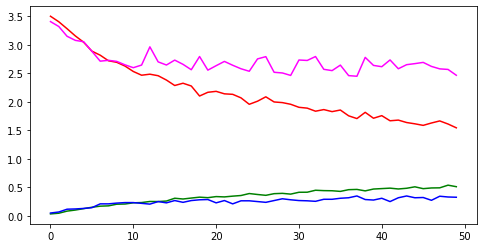

In [68]:
fig = plt.figure(figsize=(8,4))

plt.plot(history.history['loss'], color = 'red')
plt.plot(history.history['accuracy'], color = 'green')
plt.plot(history.history['val_loss'], color = 'magenta')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.show()

In [69]:
model = model2

Actual Class: George_W_Bush
Predictions:
Gloria_Macapagal_Arroyo : 0.153252
Megawati_Sukarnoputri : 0.0823967
Ariel_Sharon : 0.08118956
Tom_Ridge : 0.073587105
Alvaro_Uribe : 0.064390026


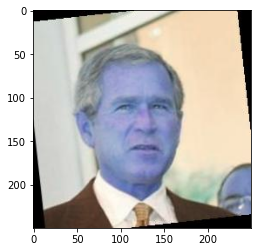

In [71]:
image_path = df_test.image_path[2]
image = cv2.imread(image_path)
plt.imshow(image)

# Prepare image
img = tf.keras.preprocessing.image.load_img(image_path)
img = tf.keras.preprocessing.image.img_to_array(img)

#img = preprocess(img)
img = cv2.resize(img,(INPUT_SIZE,INPUT_SIZE))
img_tensor = np.expand_dims(img, axis=0)
img_tensor /= 255.

# Print what the top predicted class is
preds = model.predict(img_tensor,steps=1)
preds = preds.flatten()
order = np.argsort(preds)
order = order[::-1]
print('Actual Class:',df_test.name[2])
print('Predictions:')
for i in range(5):
    if preds[order[i]] == 0:
        break
    else:
        print(myclasses[order[i]], ':', preds[order[i]])

In [72]:
preds = model.predict(test_set)

In [73]:
guesses = np.argmax(preds,1)

In [74]:
test_loss, test_acc = model.evaluate(test_set)

35/35 [==============================] - 1s 32ms/step - loss: 2.2088 - accuracy: 0.3464


In [75]:
realLabels = np.array([])
for i in range (len(test_set)):
    batch = np.array(test_set[i][1])
    batch = np.argmax(batch, axis = 1)
    realLabels = np.concatenate((realLabels,batch.flatten()), axis = 0)

<AxesSubplot:>

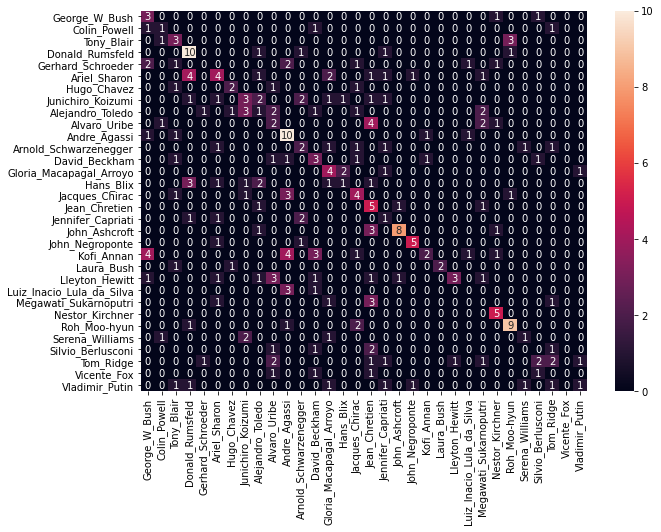

In [76]:
import seaborn as sn

numClasses = len(myclasses)
conf = np.zeros([numClasses,numClasses])

for i in range(realLabels.shape[0]):
    real = realLabels[i]
    guess = guesses[i]
    conf[int(real),guess] = conf[int(real),guess] + 1
 

df_cm = pd.DataFrame(conf, index = [i for i in myclasses],
                  columns = [i for i in myclasses])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

### 5. Visualization of CNN

In [77]:
IMG_SIZE = INPUT_SIZE
img_size = (IMG_SIZE,IMG_SIZE)

last_conv_layer_name = "conv2d_8"
classifier_layer_names = ["max_pooling2d_6","flatten_2", "dense_7", "activation_16","dropout_5","dense_8", "activation_17", "dropout_6", "dense_9", "activation_18"]

In [78]:
from tensorflow.keras.callbacks import ModelCheckpoint
from skimage import transform 

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names):

    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = tf.keras.Model(model.inputs, last_conv_layer.output)

    classifier_input = tf.keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = tf.keras.Model(classifier_input, x)

    with tf.GradientTape() as gt:
        last_conv_layer_output = last_conv_layer_model(img_array)
        gt.watch(last_conv_layer_output)
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    grads = gt.gradient(top_class_channel, last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    heatmap = np.mean(last_conv_layer_output, axis=-1)

    heatmap = np.maximum(heatmap, 0) / (np.max(heatmap)+np.finfo(float).eps)
    return heatmap

Predicted: 29

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



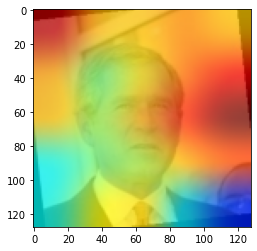

In [79]:
import matplotlib.cm as cm

image_path = df_test.image_path[2]
image = cv2.imread(image_path)
image = transform.resize(image, [128,128,3])
plt.imshow(image)
img_array = image.reshape(1,IMG_SIZE,IMG_SIZE,3)
preds = model.predict(img_array,steps=1)
print("Predicted:", np.argmax(preds))



heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names)

heatmap = np.uint8(255 * heatmap)

jet = cm.get_cmap("jet")

jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((image.shape[1], image.shape[0]))
jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

image = image*255
superimposed_img = jet_heatmap + image * 0.4
superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)
plt.imshow(superimposed_img)

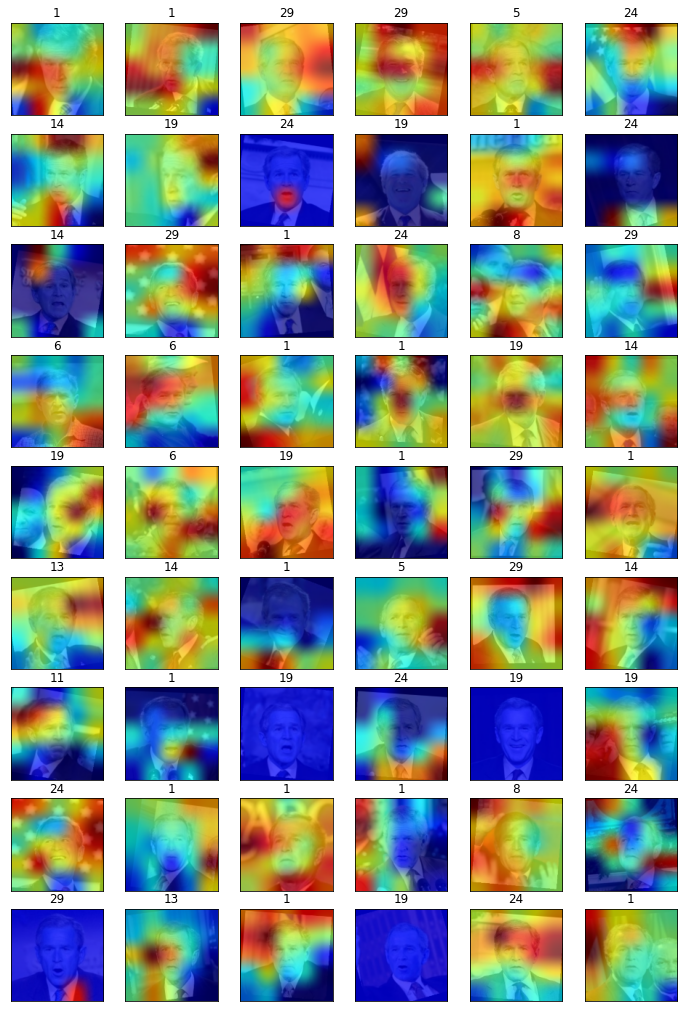

In [80]:
#Testing

fig = plt.figure(figsize=(12, 18))
for i in range(multi_data.shape[0]):
    y = fig.add_subplot(9, 6, i+1)
    image_path = multi_data.image_path[i]
    img = cv2.imread(image_path)
    img = transform.resize(img, [128,128,3])
    img_array = img.reshape(1,IMG_SIZE,IMG_SIZE,3)
    preds = model.predict(img_array,steps=1)


    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names)

    heatmap = np.uint8(255 * heatmap)

    jet = cm.get_cmap("jet")

    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    img = img*255
    superimposed_img = jet_heatmap + img * 0.4
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)
    model_out = model.predict(img_array)

    str_label= str(np.argmax(model_out))
    
    y.imshow(superimposed_img)
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    if i==53:
        break;
plt.show()

### 6. Result Ananlysis

https://paperswithcode.com/sota/face-verification-on-labeled-faces-in-the

Drawing conclusions from our constructed model for this project, we have to mention the poor performance of our CNN network. When compared to other, professionally constructed networks for the LFW datset, our performance is clearly lacking.  However, I still believe that the project is a good example of what CNNs can be used for and offers many possibilities for further research and model improvements. 